In [2]:
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
#functions for integral
from tensorflow.python.ops import math_ops

def trapezoidal_integral_approx(t, y):
    return math_ops.reduce_sum(
            math_ops.multiply(t[:-1] - t[1:],
                              (y[:-1] + y[1:]) / 2.), 
            name='trapezoidal_integral_approx')
def trapazoid(f,a, b):
    u = (b - a)
    v = (f(a) + f(b))
    return (u * v) / 2
def simpson(f,a, b):
    u = (b - a)
    v = (f(a) + 4 * f((a + b)/2) + f(b))
    return (u * v) / 6
def approx_int(m,f,interval = (0,10),rule = trapazoid):
    assert interval.__len__() == 2
    a = interval[0]
    b = interval[1]
    x_i_1 = a
    sum = 0
    for k in range(1,m + 1):
        x_i = x_i_1
        x_i_1 = a + k * ( ( b - a )/m ) 
        sum += rule(f,x_i, x_i_1)
    return sum

We want to train the neural network for the ODE  <br>
we are trying to find a particular solution of second order inhomegenous ode

$$
m * \ddot y + c * \dot y + k * y = g(t),
$$
with $m = 1, c = 0.1$ and $k = 1$. 

Therefore we define an objective 

$$
\mathcal{L}(\mathbf{W}) = \frac{1}{M}\sum_{i=1}^M (m * \ddot y_\mathbf{W}(t_i) + c * \dot y_\mathbf{W}(t_i) + k * y_\mathbf{W}(t_i)) ^ 2 + (y_\mathbf{W}(0) - y_0) ^ 2 + (\dot y_\mathbf{W}(0) - \dot y_0) ^ 2
$$

In [5]:
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

In [6]:
a = 1
b = 1
c = 1
y0 = 1.
y0_prime = 0.

In [7]:

def g(t):
    return t
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.cos(2*np.pi*t)
    IC_loss = net(t_0) - one

In [8]:
#can we try to define the loss with integral?
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

losses

In [9]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [10]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

In [11]:
trainable_vars = NN.trainable_variables

train

In [12]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record.append(loss)




In [13]:
y_pred = NN.predict(train_t)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1/1 [==============================] - 0s 229ms/step


plot

In [14]:
import matplotlib.pyplot as plt

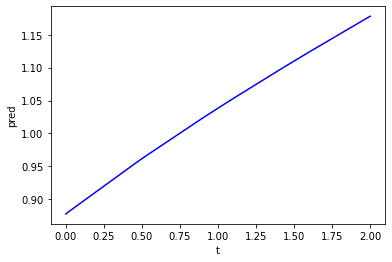

In [15]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, y_pred,"b")



harmonischer oszilator
$$
\ddot y + r * \dot y + \omega ^2 * y = B * cos(\Omega * t),
$$

In [16]:
a = 1
b = 1
c = 1
y0 = 0
w = 1
y0_prime = 0.


def g(t):
    return np.cos(w * t) 

In [18]:
tf.cos

<function tensorflow.python.ops.gen_math_ops.cos(x, name=None)>

In [34]:
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'), #2 additional layers
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),

    tf.keras.layers.Dense(units = 1)
])

In [20]:
class GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads, vars):
    # Update variables
    for grad, var in zip(grads, vars):
      var.assign_sub(self.learning_rate*grad)

In [26]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

osz train

In [28]:
trainable_vars = NN.trainable_variables

In [29]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)

epochs = 300
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record1.append(loss)




In [ ]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 93ms/step


In [ ]:
def solution(t):
    A = 4
    m = (1 -A**2)**2 + A**2
    z = ((1 - A**2)*np.cos(A * t) )/m +  ( -(A)*np.sin(A * t) )/m
    return  z
# def solution(t):
#     return np.sin(t)

In [31]:
def solution(t):
    return np.sin(t)

In [32]:
x_test = np.linspace(0,2,20)

plot

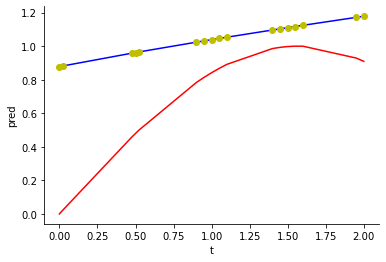

In [33]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t,y_pred,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t, y_pred,"yo")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

L2 loss


In [ ]:
from tensorflow.python.ops import math_ops

t = np.linspace(0,1,10**2)
t = t.reshape((t.shape[0],1))

def trapezoid(t, y):
    return math_ops.reduce_sum(
            math_ops.multiply( t[1:] - t[:-1],
                              (y[:-1] + y[1:]) / 2.))
            #  name='trapezoidal_integral_approx')
np.sqrt ( trapezoid(t,(NN(t) - solution(t))**2) )

0.20998633

In [ ]:

points = np.linspace(0,2,20)
sol_p = np.array([solution(t) for t in points])
trapezoidal_integral_approx(NN(points),sol_p)

# fig, axs = plt.subplots(1)
# axs.set_xlabel("t")
# axs.set_ylabel("pred")
# axs.plot(points,NN(points),"b")
# axs.plot(points, [solution(t) for t in points],"r")


<tf.Tensor: shape=(), dtype=float32, numpy=-7.8604217>

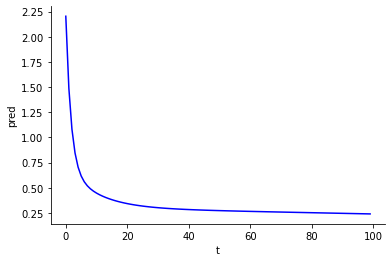

In [ ]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_loss_record,"b")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

In [ ]:
train_loss_record.__len__()

100

mit Gradient descent ohne momemntum

In [ ]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
     tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])
optimizer = GradientDescent()
trainable_vars = NN.trainable_variables
epochs = 300
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
        grad = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(grad, trainable_vars)
    train_loss_record1.append(loss)


In [ ]:
trapezoidal_integral_approx(t,(NN(t) - np.sin(t) )**2)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.20663868>

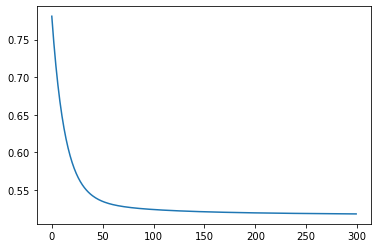

In [ ]:
f,axs = plt.subplots(1)
axs.plot([t for t in range(train_loss_record1.__len__())],train_loss_record1)

1/1 [==============================] - 0s 85ms/step


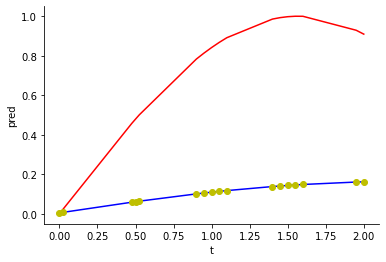

In [ ]:
y_pred = NN.predict(train_t)
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t,y_pred,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t, y_pred,"yo")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

wire sehen der verlust erreicht platteu

In [ ]:
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),


    tf.keras.layers.Dense(units = 1)
])
T = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

competitive 0

In [ ]:
def shared_loss(t,NN,T,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = T(t) *( tf.square(ode_loss) + tf.square(iv_loss) )

    total_loss = tf.reduce_mean(square_loss)
    return total_loss

In [ ]:
trainable_vars1 = NN.trainable_variables
trainable_vars2 = T.trainable_variables

In [ ]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)

epochs = 300
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss1 = shared_loss(train_t,NN,T,g)
        loss2 =  -loss1
    grad = tape.gradient(loss1, trainable_vars1)
    optimizer.apply_gradients(zip(grad, trainable_vars1))
    #discriminator
    grad = tape.gradient(loss2, trainable_vars2)
    optimizer.apply_gradients(zip(grad, trainable_vars2))
    
    train_loss_record1.append(loss1)


In [ ]:
y_pred = NN.predict(train_t)
z_pred = T.predict(train_t)

1/1 [==============================] - 0s 99ms/step


e

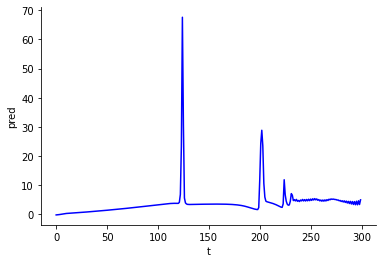

In [ ]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_loss_record1,"b")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

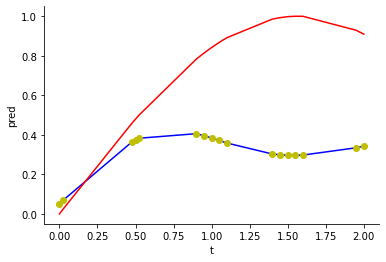

In [ ]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t,y_pred,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t,y_pred,"yo")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

In [ ]:
np.sqrt ( trapezoid(t,(NN(t) - solution(t))**2) )

0.2058129

weiter Lösungen in abhängigkeit von r ?
approximation der Lösung in polyomen


we are trying to make a ansatz of the form $$e^{NN} - 1$$

In [ ]:
y0

NameError: name 'y0' is not defined

In [ ]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = tf.exp(NN(t)) - 1
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = y0 - (tf.exp(NN(t_0)) - 1) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [ ]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record2 = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,g)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record2.append(loss)




plot

In [ ]:
def solution(t):
    return np.sin(t)

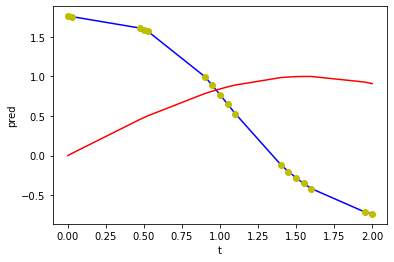

In [ ]:
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, tf.exp(y_pred) - 1,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
# axs.plot(train_t, solution(t),"r")
axs.plot(train_t,  tf.exp(y_pred) -1,"yo")

In [ ]:

fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")

# axs.plot(train_loss_record,"b")
axs.plot(train_loss_record2,"r")
axs.set_yscale("log")

In [ ]:
train_loss_record1

simulatinious training, try mimic $$ g(t) = cos (\omega\ t) $$

In [ ]:
NN__2 = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'), #2 additional layers
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),

    tf.keras.layers.Dense(units = 1)
])

In [ ]:
def inh(t,NN,NN__2,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        o = NN(t)*tf.cos(NN__2(t)*t) 
        dnn = tape.gradient(o, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * o - g(t))
   
    iv_loss = y0 - NN(t_0)*tf.cos(NN__2(t_0)*t_0)  # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [ ]:
trainable_vars =  NN.trainable_variables
train_vars2 = NN__2.trainable_variables
# trainable_vars = np.concatenate((trainable_vars,NN__2.trainable_variables))
# c = tf.concat((NN.trainable_variables,NN__2.trainable_variables), axis=0)

In [ ]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record = []

optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh(train_t,NN,NN__2,g)
    grad = tape.gradient(loss, trainable_vars)
    grad2 = tape.gradient(loss,train_vars2 )
    optimizer.apply_gradients(zip(grad, trainable_vars))
    optimizer.apply_gradients(zip(grad2, train_vars2))
    train_loss_record.append(loss)
    train_loss_record.append(loss)




In [ ]:
y_pred1 = NN.predict(train_t)
y_pred2  = NN__2.predict(train_t)


1/1 [==============================] - 0s 69ms/step


In [ ]:
arr = [solution(t[0]) for t in train_t]

In [ ]:
def ansatz(t):
    u = tf.cos(NN(t))
    v = tf.sin(NN__2(t))
    return u + v
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t,  y_pred1*tf.cos(y_pred2*train_t) ,"b")
axs.plot(train_t, arr,"r")
# axs.plot(train_t, tf.sin(y_pred1) + tf.cos(y_pred2) ,"yb")

 find solution in dependence of r

In [ ]:
r_train

<tf.Tensor: shape=(17,), dtype=float64, numpy=
array([ 1.    ,  1.5625,  2.125 ,  2.6875,  3.25  ,  3.8125,  4.375 ,
        4.9375,  5.5   ,  6.0625,  6.625 ,  7.1875,  7.75  ,  8.3125,
        8.875 ,  9.4375, 10.    ])>

In [22]:
a = 1
b = 1
c = 1
y0 = 1.
y0_prime = 0.
def g(t):
    return np.cos(t) 

#we try putting the parameter outside the nework
NN_r = Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'), #2 additional layers
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),

    tf.keras.layers.Dense(units = 1)
])

def inh(t,NN,g,r):
    # def g(t,r):
    #     return np.cos(r * t) 
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    r = tf.constant(r, dtype = tf.float32)
    v = tf.concat([r,t],1)
    t
    # input_tensor = tf.concat([r,t],1)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(v)
        dnn = tape.gradient(u, t)
        tf.print(dnn)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + r * dnn + c * u - g(t))
   
    iv_loss = y0 - NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

        
    

In [23]:
c = 1
def concat(t,r):
    return tf.concat([r,t],1)


# @tf.function    
# def f(t,r):
#     # with tf.GradientTape(persistent=True) as tape:
#     #     tape.watch(t)
#     v = c(t,r)
#     u = NN_r(v)
#     dnn = tf.gradients(u, t)[0]
#     tf.print(dnn)
#     ddnn = tf.gradients(dnn,t)[0]
    
    
    
def f1(t,r,g):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        v = concat(t,r)
        u = NN_r(v)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
        f = (a * ddnn + r * dnn + c * u - g(t))
    return f
    

In [24]:
# @tf.function
def inh_tf(t,NN,g,r):
    # def g(t,r):
    #     return np.cos(r * t) 

    t = tf.constant(t, dtype = tf.float32)
    r = tf.constant(r, dtype = tf.float32)
    v = tf.concat([r,t],1)
    y_0 = 1
    t_0 = tf.zeros((17,1))
    y_0 = tf.ones((17,1)) * y_0
    # input_tensor = tf.concat([r,t],1)
    # t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    ode_loss =  f1(t,r,g)
    # initial_loss = y0 - tf.square(ode_loss) 
    iv_loss = y0 - NN_r(concat(t_0,r)) 
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    total_loss = tf.reduce_mean(square_loss)
    return total_loss

In [25]:
# f1(t,r,g)

In [26]:
train_t = np.array(train_t,dtype=np.float32)

init

In [ ]:
t = train_t.reshape(-1,1)
# r = tf.ones((17,1))
r = np.linspace(0,4,17).reshape(-1,1)
r = tf.constant(r, dtype = tf.float32)
t = tf.constant(t, dtype = tf.float32)
v = tf.concat([r,t],1)
u = NN_r(v)

In [ ]:
# @tf.function
# def grad():
#     with tf.GradientTape(persistent=True) as tape:
#         tape.watch(v[0])
#         tape.watch(v[1])
        
#         u = NN_r(v)
#         grad = tf.gradients(u, v[0])[0][:,0]
#         tf.print(grad)
# grad()

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(t)
    u = NN_r(tf.concat([r,t],1))
    dnn = tape.gradient(u, t)
    ddnn = tape.gradient(dnn,t)
    tf.print(ddnn)


[[-0.113248602]
 [-0.123665571]
 [-0.0798022076]
 ...
 [0.037897069]
 [0.0622544065]
 [0.0579255]]


train 

In [ ]:

train_loss_record4 = []
trainable_vars = NN_r.trainable_variables
optimizer = tf.optimizers.SGD(learning_rate=0.01)
epochs = 100 
for _ in range(epochs):
    with tf.GradientTape(persistent=True) as tape: 
        loss = inh_tf(train_t,NN_r,g,r)
    grad = tape.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(grad, trainable_vars))
    train_loss_record4.append(loss)


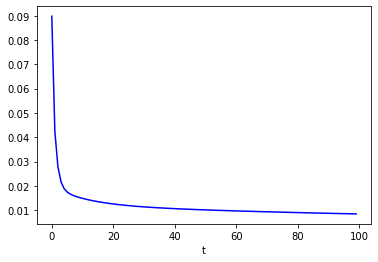

In [ ]:
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
train_loss_record4
axs.plot(train_loss_record4,"b")

In [ ]:
NN_r(np.reshape([0,1],(1,2)))
NN_r.predict(concat(tf.zeros((17,1)),r))

1/1 [==============================] - 0s 29ms/step


array([[0.9561721 ],
       [1.004394  ],
       [1.0388123 ],
       [1.0596757 ],
       [1.068784  ],
       [1.0686865 ],
       [1.0620046 ],
       [1.0510299 ],
       [1.0375701 ],
       [1.0229502 ],
       [1.0080829 ],
       [0.99356365],
       [0.97975385],
       [0.9668524 ],
       [0.95494723],
       [0.9440528 ],
       [0.9341382 ]], dtype=float32)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.8823595>

In [ ]:
NN = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),


    tf.keras.layers.Dense(units = 1)
])
T = Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

c gradientdescent 

In [ ]:
# tf.hessians(
#     ys,
#     xs,
#     gate_gradients=False,
#     aggregation_method=None,
#     name='hessians'
# )

In [ ]:
class C_GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads,hess, vars):
    # Update variables
    for grad,hess, var in zip(grads,hess, vars):
      print(type(var))
      print(type(hess))
      print(type(grads))
      var.assign_sub(self.learning_rate*grad + self.learning_rate**2  * (hess * grad))

In [ ]:
# # dy_dx = gg.gradient(y, x)
# loss = shared_loss(train_t,NN,T,g)
# grad2 = tape.gradient(loss, trainable_vars2)
# hess_yx = tape.gradient(grad2,trainable_vars1)


In [ ]:
# optimizer = C_GradientDescent()


# epochs = 300
# for _ in range(epochs):
#     with tf.GradientTape(persistent=True) as tape: 
#         loss = shared_loss(train_t,NN,T,g)
        
#     grad1 = tape.gradient(loss, trainable_vars1)
#     grad2 = tape.gradient(loss, trainable_vars2)
    
#     hess_xy = tape.gradient(grad1,trainable_vars2)
#     hess_yx = tape.gradient(grad2,trainable_vars1)
    
    
#     optimizer.apply_gradients(grad,hess_xy, trainable_vars)
#     train_loss_record1.append(loss)


--

In [ ]:

# https://i-systems.github.io/tutorial/KSNVE/220525/01_PINN.html#3.2.-Lab-1%3A-Simple-Example
#https://deeplearningmath.org/general-fully-connected-neural-networks

In [ ]:
from tensorflow.python.ops import math_ops

def trapezoidal_integral_approx(t, y):
    return math_ops.reduce_sum(
            math_ops.multiply(t[:-1] - t[1:],
                              (y[:-1] + y[1:]) / 2.), 
            name='trapezoidal_integral_approx')
trapezoidal_integral_approx(t,NN(t))

<tf.Tensor: shape=(), dtype=float32, numpy=-2.061646>

\begin{bmatrix}
  & a_{12} &  & \dots & a_{1n} \\
a_{21} & a_{22} & a_{23}b\small& \ \\
\dots  & \dots  & \dots  & \dots & \dots  \\
a_{n1} & a_{n2} & a_{n3} & \dots & a_{nn} 
\end{bmatrix}


\begin{bmatrix}
{\Large W}   \\

 
\end{bmatrix}




